## 소상공인시장진흥공단 Sbiz - 지역별 경영현황 데이터  크롤링
- https://sg.sbiz.or.kr/godo/index.sg
- **주간인구수**: 시군구 단위의 주간인구통계 (단위:천명) /\
  **밀집도**: 인구 천명당 사업체수 /\
  **밀집도_중위값**: 세세분류 단위에서 밀집도 중위값 /\
  **밀집정도**: 밀집도 - 밀집도_중위값 (0 이상인 경우 " 고"로, 미안인 경우 " 저"로 구분) /\
  **동종근로자_임금_수준미만**: 연간 영업이익 대비 동종입금근로자 임금 수준미만인 업종 비중 /\
  **동종근로자_임금_수준미만_척도**: 4점 척도로 연간 영업이익 대비 등종업종근로자 임금 수준이 미만인 사업체 비중을 세세분류 수준에서, \
  사업체 중 차지하는 비중이 75 % 이상 " 매우 높음"\
  사업체 중 차지하는 비중이 50 ~ 7496 " 높음"\
  사업체 중 차지하는 비중이 25 ~ 4996 " 보통"\
  사업체 중 차지하는 비중이 25 % 이하 " 낮음"으로 평가
  
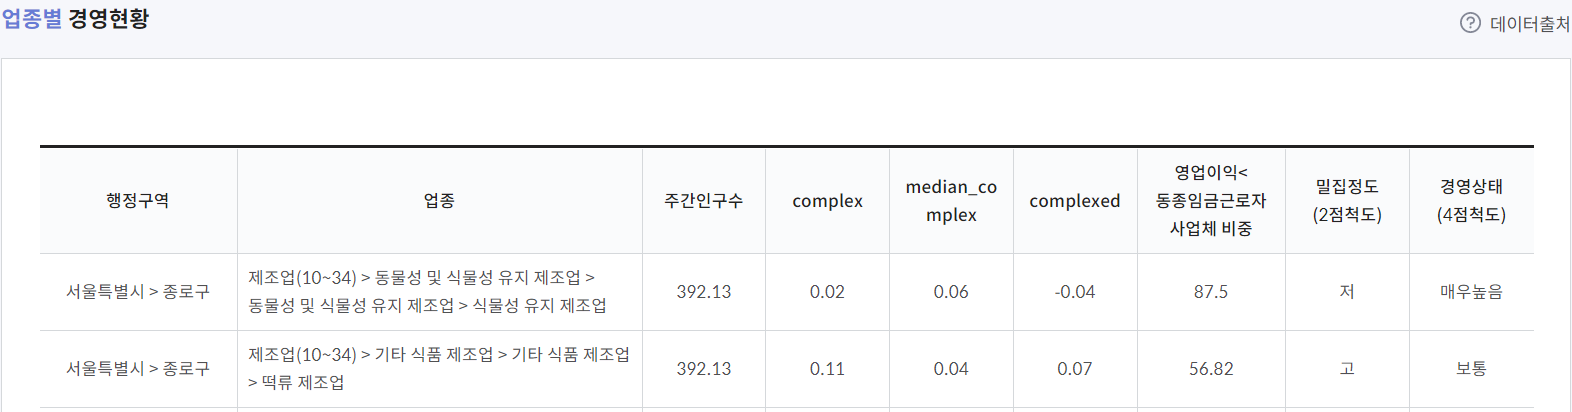

### 1) 크롤링 코드

In [1]:
import re
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import time
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')

In [29]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.implicitly_wait(10)
time.sleep(0.5)
s_data, 행정구역, 행정구역, 업종, 주간인구수, 밀집도, 밀집도_중위값, 밀집정도, 동종근로자_임금_수준미만, 동종근로자_임금_수준미만_척도 = [],[],[],[],[],[],[],[],[],[] 

driver.get('https://sg.sbiz.or.kr/godo/stat/updens.sg')
for region in range(17,18):
    for industry in range(2,23):
        driver.implicitly_wait(10)
        time.sleep(1)
        try :
            driver.find_element(By.XPATH,'//*[@id="page4-1"]/div[1]/div/div[1]/ul/li[1]/div').click()
        except :
            time.sleep(2)
            driver.find_element(By.XPATH,'//*[@id="page4-1"]/div[1]/div/div[1]/ul/li[1]/div').click()
        driver.implicitly_wait(10)
        time.sleep(1)
        for i in range(1, region+1):
            driver.find_element(By.XPATH,f'//*[@id="megaUl"]/li[{i+1}]/label').click()
            driver.implicitly_wait(10)
            time.sleep(0.5)
            if i % 5 == 0 :
                driver.find_element(By.TAG_NAME, 'html').send_keys(Keys.ARROW_DOWN)
                driver.implicitly_wait(10)
                time.sleep(1)
        driver.implicitly_wait(10)
        time.sleep(1)
        driver.find_element(By.XPATH, '//*[@id="ctyUl"]/li[1]/label').click()
        driver.implicitly_wait(10)
        time.sleep(1)
        driver.find_element(By.XPATH, '//*[@id="popupbox"]/div/div[2]/div/div[2]/a[2]').click()  
        driver.implicitly_wait(10)
        time.sleep(1)
        driver.find_element(By.XPATH,'//*[@id="page4-1"]/div[1]/div/div[1]/ul/li[2]/div').click()
        driver.implicitly_wait(10)
        time.sleep(1)
        for nm in range(1, industry+1):
            driver.implicitly_wait(10)
            time.sleep(1)
            driver.find_element(By.XPATH,f'//*[@id="upjong1Ul"]/li[{nm}]/label').click()
            driver.implicitly_wait(10)
            time.sleep(1)
            if nm % 3 == 0 :
                driver.find_element(By.TAG_NAME, 'html').send_keys(Keys.ARROW_DOWN)
                driver.implicitly_wait(10)
                time.sleep(1)
            if nm % 15 == 0 :
                driver.find_element(By.TAG_NAME, 'html').send_keys(Keys.ARROW_DOWN)
                driver.implicitly_wait(10)
                time.sleep(1)
        driver.implicitly_wait(10)
        time.sleep(1)
        driver.find_element(By.XPATH, '//*[@id="upjong2Ul"]/li[1]/label').click()
        driver.implicitly_wait(10)
        time.sleep(2)
        try :
            driver.find_element(By.XPATH, '//*[@id="popupbox"]/div/div[2]/div/div[2]/a[2]').click()
        except:
            time.sleep(1)
            driver.find_element(By.XPATH, '//*[@id="popupbox"]/div/div[2]/div/div[2]/a[2]').click()
        driver.implicitly_wait(10)
        time.sleep(2)
        driver.find_element(By.XPATH, '//*[@id="page4-1"]/div[1]/div/div[2]/a').click()
        driver.implicitly_wait(10)
        time.sleep(2)
        page_source = driver.page_source
        soup = bs(page_source, 'lxml')
        try:
            soup.select('#updensTable tr')[1]
        except: pass
        else:
            table = soup.select('#updensTable td')
            for i in range(len(table)//9):
                행정구역 = table[9*i].text
                업종 = table[9*i+1].text
                주간인구수 = table[9*i+2].text
                밀집도 = table[9*i+3].text
                밀집도_중위값 = table[9*i+4].text
                밀집정도 = table[9*i+5].text
                동종근로자_임금_수준미만 = table[9*i+6].text
                동종근로자_임금_수준미만_척도 = table[9*i+7].text
                s_data.append([행정구역, 업종, 주간인구수, 밀집도, 밀집도_중위값, 밀집정도, 동종근로자_임금_수준미만, 동종근로자_임금_수준미만_척도])

driver.quit()

17번쨰 완료


### 2) 데이터 저장 : sbiz_df.csv

In [31]:
sbiz_df = pd.DataFrame(s_data, columns=['행정구역', '업종', '주간인구수', '밀집도', '밀집도_중위값', '밀집정도', '동종근로자_임금_수준미만', '동종근로자_임금_수준미만_척도'])
sbiz_df.to_excel('sbiz_df.xlsx') 
sbiz_df.head(10)

,행정구역,업종,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만,동종근로자_임금_수준미만_척도
0,서울특별시 > 종로구,제조업(10~34) > 동물성 및 식물성 유지 제조업 > 동물성 및 식물성 유지 제...,392.13,0.02,0.06,-0.04,87.50,저
1,서울특별시 > 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 떡류 제조업,392.13,0.11,0.04,0.07,56.82,고
2,서울특별시 > 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 빵류 제조업,392.13,0.01,0.04,-0.04,100.00,저
3,서울특별시 > 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 천연 및 혼합 조...,392.13,0.01,0.04,-0.03,100.00,저
4,서울특별시 > 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 커피 가공업,392.13,0.01,0.04,-0.04,100.00,저
5,서울특별시 > 종로구,제조업(10~34) > 기타 식품 제조업 > 기타 식품 제조업 > 건강 보조용 액화...,392.13,0.04,0.04,-0.01,80.00,저
6,서울특별시 > 종로구,제조업(10~34) > 방적 및 가공사 제조업 > 방적 및 가공사 제조업 > 연사 ...,392.13,0.01,0.03,-0.02,66.67,저
7,서울특별시 > 종로구,제조업(10~34) > 직물 직조 및 직물제품 제조업 > 직물 직조 및 직물제품 제...,392.13,0.02,0.03,-0.01,42.86,저
8,서울특별시 > 종로구,제조업(10~34) > 직물 직조 및 직물제품 제조업 > 직물 직조 및 직물제품 제...,392.13,0.02,0.03,0.00,55.56,저
9,서울특별시 > 종로구,제조업(10~34) > 직물 직조 및 직물제품 제조업 > 직물 직조 및 직물제품 제...,392.13,0.01,0.03,-0.01,60.00,저


### 3) 결측치 확인

In [34]:
sbiz_df.isnull().sum()

행정구역                0
업종                  0
주간인구수               0
밀집도                 0
밀집도_중위값             0
밀집정도                0
동종근로자_임금_수준미만       0
동종근로자_임금_수준미만_척도    0
dtype: int64

### 4) '동종근로자_임금_수준미만_척도' 범주형 데이터 처리

In [53]:
sbiz_df['동종근로자_임금_수준미만_척도'][sbiz_df['동종근로자_임금_수준미만_척도'] == '고'] = 1
sbiz_df['동종근로자_임금_수준미만_척도'][sbiz_df['동종근로자_임금_수준미만_척도'] == '저'] = 0

In [54]:
sbiz_df['동종근로자_임금_수준미만_척도'] = sbiz_df['동종근로자_임금_수준미만_척도'].astype('float')

### 5) '행정구역' 데이터와 NICE Bizinfo 기업별 주소와의 매칭
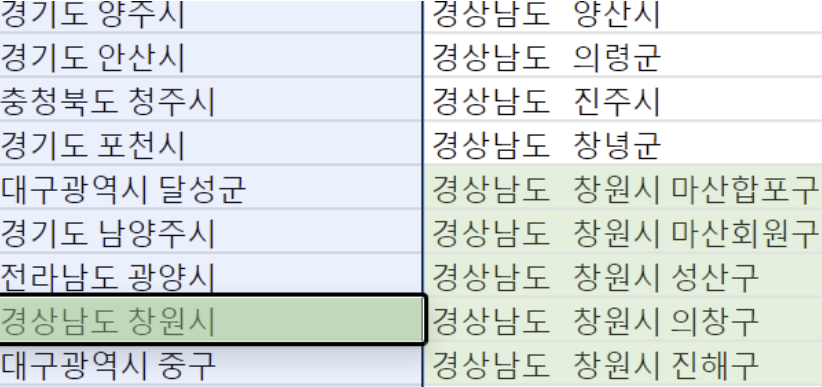

In [55]:
sbiz_df['행정구역'].value_counts()

인천광역시 > 서구     534
인천광역시 > 남동구    521
대구광역시 > 북구     512
인천광역시 > 부평구    487
대구광역시 > 달서구    484
              ... 
전라남도 > 신안군     117
경상북도 > 영양군     116
경상남도 > 산청군     107
경상남도 > 의령군     106
경상북도 > 울릉군      88
Name: 행정구역, Length: 252, dtype: int64

In [56]:
#불용어 제거
sbiz_df['행정구역'].replace(' >', '', regex=True, inplace=True)
sbiz_df['행정구역']

0        서울특별시 종로구
1        서울특별시 종로구
2        서울특별시 종로구
3        서울특별시 종로구
4        서울특별시 종로구
           ...    
70050      강원도 양양군
70051      강원도 양양군
70052      강원도 양양군
70053      강원도 양양군
70054      강원도 양양군
Name: 행정구역, Length: 70055, dtype: object

In [57]:
#NICE Bizinfo 데이터 불러오기
bizinfo_df = pd.read_excel('bizinfo_df_prep.xlsx', index_col=0)
bizinfo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35709 entries, 1018100340 to 8998800785
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   address      34329 non-null  object 
 1   industry     34330 non-null  object 
 2   ind_rank     31300 non-null  float64
 3   payroll      28056 non-null  float64
 4   new_payroll  28056 non-null  float64
 5   employee     23178 non-null  float64
 6   employment   27797 non-null  float64
 7   resignation  27911 non-null  float64
 8   cmp_years    24104 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.7+ MB


In [58]:
bizinfo_df.isnull().sum()

address         1380
industry        1379
ind_rank        4409
payroll         7653
new_payroll     7653
employee       12531
employment      7912
resignation     7798
cmp_years      11605
dtype: int64

In [59]:
#NICE Bizinfo 주소 데이터 시,구,도로 구분
bizinfo_df['sub_add1'] = bizinfo_df['address'].str.split().str[0]
bizinfo_df['sub_add2'] = bizinfo_df['address'].str.split().str[1]
bizinfo_df['sub_add3'] = bizinfo_df['address'].str.split().str[2]
bizinfo_df['sub_add_mix'] = bizinfo_df['sub_add_mix'] = bizinfo_df['sub_add2'] + bizinfo_df['sub_add3']

print(bizinfo_df['sub_add1'].unique())
print()
print(bizinfo_df['sub_add2'].unique())
print()
print(bizinfo_df['sub_add3'].unique())

['서울' '경기' '충북' '인천' '대구' '부산' nan '전북' '강원' '경북' '대전광역시' '전남' '경남' '대전'
 '제주' '충남' '광주' '강원도' '울산' '서울시' '세종' '인천광역시' '서울특별시' '경상남도' '경기도' '경상북도'
 '충청북도' '충청남도' '아산군' '전라북도' '전라남도']

['종로구' '중구' '구로구' '의왕시' '강남구' '서대문구' '의정부시' '음성군' '성남시' '금천구' '파주시' '서초구'
 '성동구' '연수구' '영등포구' '김포시' '안양시' '고양시' '마포구' '강서구' '용산구' '부평구' '평택시' '동대문구'
 '하남시' '동구' '광진구' '송파구' '서구' '수원시' '제천시' nan '용인시' '달서구' '전주시' '성북구' '강릉시'
 '양천구' '화성시' '포항시' '강동구' '과천시' '영광군' '동작구' '목포시' '상주시' '익산시' '김제시' '구미시'
 '군포시' '광주시' '춘천시' '여수시' '인제군' '여주시' '시흥시' '안동시' '오산시' '창녕군' '영암군' '제주시'
 '정읍시' '중랑구' '당진시' '경주시' '양주시' '안산시' '청주시' '포천시' '달성군' '남양주시' '광양시' '창원시'
 '계양구' '미추홀구' '진천군' '의령군' '아산시' '완주군' '부천시' '충주시' '거제시' '북구' '영덕군' '김해시'
 '남구' '서천군' '수성구' '수영구' '양산시' '유성구' '논산시' '은평구' '안성시' '남동구' '울주군' '가평군'
 '사상구' '문경시' '보령시' '관악구' '예산군' '천안시' '이천시' '노원구' '군산시' '칠곡군' '함안군' '진주시'
 '순천시' '광명시' '영천시' '영주시' '산청군' '해운대구' '사천시' '도봉구' '금정구' '광산구' '나주시' '소정면'
 '연제구' '기장군' '강북구' '강화군' '순창군' '부산진구' '서산시' '구리시' '장성군' '서귀포시' '진도군' '원주시'
 '임실군

In [60]:
#NICE Bizinfo 주소 데이터 시/도 전처리
bizinfo_df['sub_add1'] = bizinfo_df['sub_add1'].replace('서울', '서울특별시').replace('서울시', '서울특별시').replace('경기', '경기도')
bizinfo_df['sub_add1'] = bizinfo_df['sub_add1'].replace('전남', '전라남도').replace('전북', '전라북도').replace('경남', '경상남도')
bizinfo_df['sub_add1'] = bizinfo_df['sub_add1'].replace('경북', '경상북도').replace('충북', '충청북도').replace('충남', '충청남도')
bizinfo_df['sub_add1'] = bizinfo_df['sub_add1'].replace('강원', '강원도').replace('부산', '부산광역시').replace('울산', '울산광역시')
bizinfo_df['sub_add1'] = bizinfo_df['sub_add1'].replace('인천', '인천광역시').replace('세종', '세종특별자치시').replace('대전', '대전광역시')
bizinfo_df['sub_add1'] = bizinfo_df['sub_add1'].replace('대구', '대구광역시').replace('광주', '광주광역시').replace('제주', '제주특별자치도')

bizinfo_df['sub_add1'].unique()

array(['서울특별시', '경기도', '충청북도', '인천광역시', '대구광역시', '부산광역시', nan, '전라북도',
       '강원도', '경상북도', '대전광역시', '전라남도', '경상남도', '제주특별자치도', '충청남도', '광주광역시',
       '울산광역시', '세종특별자치시', '아산군'], dtype=object)

In [61]:
#sbiz 행정구역 데이터 중 문자열 5이상인 시,도들에 대한 정제
sbiz_df['temp'] = sbiz_df['행정구역'].str.split().str[1]
temp = sbiz_df['temp'].loc[sbiz_df['temp'].str.len() >= 5].unique()
temp

array(['청주시흥덕구', '청주시상당구', '청주시서원구', '청주시청원구', '천안시동남구', '천안시서북구',
       '전주시완산구', '전주시덕진구', '포항시남구', '포항시북구', '창원시의창구', '창원시성산구',
       '창원시마산합포구', '창원시마산회원구', '창원시진해구', '수원시장안구', '수원시권선구', '수원시팔달구',
       '수원시영통구', '성남시수정구', '성남시중원구', '성남시분당구', '안양시만안구', '안양시동안구',
       '부천시원미구', '부천시소사구', '부천시오정구', '안산시상록구', '안산시단원구', '고양시덕양구',
       '고양시일산동구', '고양시일산서구', '용인시처인구', '용인시기흥구', '용인시수지구'], dtype=object)

In [62]:
bizinfo_df['행정구역'] = bizinfo_df['sub_add1'] + " " + bizinfo_df['sub_add2']
for i in bizinfo_df.index:
    if bizinfo_df.loc[i,'sub_add1'] == '세종특별자치시':
        bizinfo_df.loc[i,'행정구역'] = '세종특별자치시 세종시'
    elif bizinfo_df.loc[i,'sub_add1'] == '아산군':
        bizinfo_df.loc[i,'행정구역'] = '충청남도 아산시'
    elif bizinfo_df.loc[i,'sub_add_mix'] in temp:
        bizinfo_df.loc[i,'행정구역'] = str(bizinfo_df.loc[i,'sub_add1']) + " " + str(bizinfo_df.loc[i,'sub_add_mix'])

bizinfo_df['행정구역'].unique()

array(['서울특별시 종로구', '서울특별시 중구', '서울특별시 구로구', '경기도 의왕시', '서울특별시 강남구',
       '서울특별시 서대문구', '경기도 의정부시', '충청북도 음성군', '경기도 성남시중원구', '서울특별시 금천구',
       '경기도 파주시', '서울특별시 서초구', '서울특별시 성동구', '인천광역시 연수구', '서울특별시 영등포구',
       '경기도 김포시', '경기도 안양시동안구', '경기도 고양시일산서구', '서울특별시 마포구', '서울특별시 강서구',
       '서울특별시 용산구', '인천광역시 부평구', '경기도 평택시', '서울특별시 동대문구', '경기도 하남시',
       '인천광역시 중구', '대구광역시 동구', '서울특별시 광진구', '서울특별시 송파구', '인천광역시 서구',
       '부산광역시 동구', '경기도 수원시팔달구', '충청북도 제천시', nan, '경기도 용인시처인구',
       '대구광역시 달서구', '전라북도 전주시완산구', '서울특별시 성북구', '강원도 강릉시', '서울특별시 양천구',
       '경기도 화성시', '경상북도 포항시북구', '경기도 성남시분당구', '대전광역시 서구', '서울특별시 강동구',
       '경기도 과천시', '경기도 수원시영통구', '전라남도 영광군', '서울특별시 동작구', '전라남도 목포시',
       '경상북도 상주시', '전라북도 익산시', '전라북도 김제시', '경상북도 구미시', '경기도 군포시',
       '경기도 광주시', '경기도 고양시덕양구', '강원도 춘천시', '전라남도 여수시', '경기도 고양시일산동구',
       '강원도 인제군', '경기도 여주시', '경기도 시흥시', '경상북도 안동시', '경기도 오산시', '경상남도 창녕군',
       '부산광역시 강서구', '전라남도 영암군', '제주특별자치도 제주시', '전라북도 정읍시', '서울특별시 중랑구',
       '충청남도 당진시',

### 6)  업종 데이터  기준 평균값으로 데이터 그룹화

In [63]:
sbiz_df['업종'].value_counts()

부동산업(68) > 부동산관련 서비스업 > 부동산관련 서비스업 > 부동산 중개 및 대리업                            276
보건업 및 사회복지 서비스업(86~87) > 의원 > 의원 > 한의원                                       274
보건업 및 사회복지 서비스업(86~87) > 의원 > 의원 > 치과의원                                      273
보건업 및 사회복지 서비스업(86~87) > 의원 > 의원 > 일반의원                                      271
건설업(41~42) > 건물설비 설치 공사업 > 건물설비 설치 공사업 > 배관 및 냉ㆍ난방 공사업                       269
                                                                            ... 
제조업(10~34) > 1차 철강 제조업 > 1차 철강 제조업 > 냉간 압연 및 압출 제품 제조업                         1
제조업(10~34) > 마그네틱 및 광학 매체 제조업 > 마그네틱 및 광학 매체 제조업 > 마그네틱 및 광학 매체 제조업            1
제조업(10~34) > 의료용 기기 제조업 > 의료용 기기 제조업 > 안경 및 안경렌즈 제조업                           1
제조업(10~34) > 내화, 비내화 요업제품 제조업 > 내화, 비내화 요업제품 제조업 > 타일 및 유사 비내화 요업제품 제조업        1
운수 및 창고업(49~52) > 내륙 수상 및 항만 내 운송업 > 내륙 수상 및 항만 내 운송업 > 내륙 수상 여객 및 화물 운송업      1
Name: 업종, Length: 784, dtype: int64

In [64]:
#sbiz 업종 데이터 중에서 중분류만 가져오기
sbiz_df['업종_중분류'] = sbiz_df['업종'].str.split(' > ').str[1]
sbiz_df['업종_중분류'].value_counts()

생활용품 도매업                4625
음ㆍ식료품 및 담배 도매업          2803
음식점업                    2320
유원지 및 기타 오락관련 서비스업      2033
그 외 기타 개인 서비스업          1942
                        ... 
증기, 냉ㆍ온수 및 공기 조절 공급업       3
악기 제조업                     3
항공 화물 운송업                  1
마그네틱 및 광학 매체 제조업           1
내륙 수상 및 항만 내 운송업           1
Name: 업종_중분류, Length: 149, dtype: int64

In [65]:
sbiz_df = sbiz_df.groupby(['행정구역','업종_중분류']).mean()
sbiz_df = sbiz_df.reset_index(drop=False)
sbiz_df

,행정구역,업종_중분류,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만,동종근로자_임금_수준미만_척도
0,강원도 강릉시,1차 철강 제조업,211.74,0.020000,0.02,0.000000,75.000000,0.000000
1,강원도 강릉시,가구 제조업,211.74,0.070000,0.04,0.030000,64.856667,0.666667
2,강원도 강릉시,가전제품 및 정보 통신장비 소매업,211.74,0.226667,0.13,0.096667,74.373333,0.333333
3,강원도 강릉시,거주 복지시설 운영업,211.74,0.000000,0.00,0.000000,100.000000,1.000000
4,강원도 강릉시,건물 건설업,211.74,0.025000,0.03,0.000000,75.835000,0.250000
...,...,...,...,...,...,...,...,...
18464,충청북도 충주시,종합 소매업,207.64,0.662500,0.16,0.500000,76.097500,0.500000
18465,충청북도 충주시,주점 및 비알코올 음료점업,207.64,1.010000,0.66,0.350000,75.230000,0.333333
18466,충청북도 충주시,창작 및 예술관련 서비스업,207.64,0.005000,0.01,0.005000,58.332500,0.500000
18467,충청북도 충주시,토목 건설업,207.64,0.064000,0.03,0.034000,60.874000,0.600000


In [68]:
#'행정구역별 업종' 컬럼 생성
sbiz_df['행정구역별 업종'] = sbiz_df['행정구역'] + " " + sbiz_df['업종_중분류']
sbiz_df.head()

,행정구역,업종_중분류,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만,동종근로자_임금_수준미만_척도,행정구역별 업종
0,강원도 강릉시,1차 철강 제조업,211.74,0.020000,0.02,0.000000,75.000000,0.000000,강원도 강릉시 1차 철강 제조업
1,강원도 강릉시,가구 제조업,211.74,0.070000,0.04,0.030000,64.856667,0.666667,강원도 강릉시 가구 제조업
2,강원도 강릉시,가전제품 및 정보 통신장비 소매업,211.74,0.226667,0.13,0.096667,74.373333,0.333333,강원도 강릉시 가전제품 및 정보 통신장비 소매업
3,강원도 강릉시,거주 복지시설 운영업,211.74,0.000000,0.00,0.000000,100.000000,1.000000,강원도 강릉시 거주 복지시설 운영업
4,강원도 강릉시,건물 건설업,211.74,0.025000,0.03,0.000000,75.835000,0.250000,강원도 강릉시 건물 건설업


In [70]:
#NICE Bizinfo 불필요한 컬럼 제거
bizinfo_df.drop(['sub_add1','sub_add2','sub_add3','sub_add_mix'], axis=1, inplace=True)
bizinfo_df.head()

,address,industry,ind_rank,payroll,new_payroll,employee,employment,resignation,cmp_years,행정구역
사업자번호,,,,,,,,,,
1018100340,서울 종로구 삼일대로 428,비주거용 건물 임대업,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시 종로구
1018100772,서울 종로구 청계천로 137,(I55101)호텔업,5.0,1.0,1.0,NaN,0.000,0.00,53.0,서울특별시 종로구
1018101126,서울 종로구 율곡로 84,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.800,0.60,55.0,서울특별시 종로구
1018101242,서울 종로구 종로12길 15,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.125,0.25,NaN,서울특별시 종로구
1018103819,서울 종로구 종로 125,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,NaN,0.000,0.00,NaN,서울특별시 종로구


### 7) 외감법인 및 휴폐업기업 산업분류와 매칭

In [72]:
total_fdata = pd.read_excel('total_fdata.xlsx', index_col=0)
total_fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35721 entries, 1138111739 to 3138135248
Data columns (total 73 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CMP_PFIX_NM      23425 non-null  object 
 1   CMP_NM           35721 non-null  object 
 2   CMP_SFIX_NM      10455 non-null  object 
 3   CMP_ENM          35660 non-null  object 
 4   BZ_TYP           35721 non-null  object 
 5   CMP_SCL          35721 non-null  int64  
 6   PBCO_GB          35721 non-null  int64  
 7   PSN_CORP_GB      35721 non-null  int64  
 8   HDOF_BR_GB       35721 non-null  int64  
 9   FR_IVST_CORP_YN  35721 non-null  object 
 10  VENT_YN          35721 non-null  object 
 11  LIST_CD          135 non-null    object 
 12  IND_CD_ORDR      35706 non-null  float64
 13  IND_CD1          35721 non-null  float64
 14  IND_CD2          1283 non-null   float64
 15  IND_CD3          274 non-null    float64
 16  PB_ORG_TYP       35721 non-null  int64  
 17

In [73]:
#외감법인 및 휴폐업기업 데이터와 NICE bizinfo 데이터 결합
total_f_bizdata = pd.merge(total_fdata, bizinfo_df, left_on = total_fdata.index, right_on = bizinfo_df.index, how='left')
total_f_bizdata.shape

(35721, 84)

In [74]:
#'행정구역별 업종' 컬럼 생성
total_f_bizdata['행정구역별 업종'] = total_f_bizdata['행정구역'] + " " + total_f_bizdata['IND_CD_kor']
total_f_bizdata['행정구역별 업종'].unique()

array(['서울특별시 구로구 연료 소매업', '서울특별시 광진구 가죽, 가방 및 유사 제품 제조업',
       '인천광역시 연수구 육상 여객 운송업', ..., '대구광역시 남구 기타 전기장비 제조업',
       '경기도 김포시 기반조성 및 시설물 축조관련 전문공사업', '경기도 김포시 자동차 판매업'], dtype=object)

In [75]:
#sbiz_Df 데이터와 결합
total_f_sbizdata = pd.merge(total_f_bizdata, sbiz_df, how='left')

total_f_sbizdata.rename(columns={'key_0':'사업자번호'}, inplace=True)
total_f_sbizdata.set_index('사업자번호', inplace=True)
total_f_sbizdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35721 entries, 1138111739 to 3138135248
Data columns (total 91 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CMP_PFIX_NM       23425 non-null  object 
 1   CMP_NM            35721 non-null  object 
 2   CMP_SFIX_NM       10455 non-null  object 
 3   CMP_ENM           35660 non-null  object 
 4   BZ_TYP            35721 non-null  object 
 5   CMP_SCL           35721 non-null  int64  
 6   PBCO_GB           35721 non-null  int64  
 7   PSN_CORP_GB       35721 non-null  int64  
 8   HDOF_BR_GB        35721 non-null  int64  
 9   FR_IVST_CORP_YN   35721 non-null  object 
 10  VENT_YN           35721 non-null  object 
 11  LIST_CD           135 non-null    object 
 12  IND_CD_ORDR       35706 non-null  float64
 13  IND_CD1           35721 non-null  float64
 14  IND_CD2           1283 non-null   float64
 15  IND_CD3           274 non-null    float64
 16  PB_ORG_TYP        35721 no

In [77]:
sbizdata_prep = total_f_sbizdata[['행정구역', '업종_중분류', '주간인구수', '밀집도', '밀집도_중위값', '밀집정도', '동종근로자_임금_수준미만', '동종근로자_임금_수준미만_척도']]
sbizdata_prep

,행정구역,업종_중분류,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만,동종근로자_임금_수준미만_척도
사업자번호,,,,,,,,
1138111739,서울특별시 구로구,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2078132193,서울특별시 광진구,"가죽, 가방 및 유사 제품 제조업",323.84,0.0750,0.02,0.0475,66.305,0.50
1318167565,인천광역시 연수구,육상 여객 운송업,286.74,0.8525,0.08,0.7800,75.000,0.25
5048128251,경상북도 경산시,자동차 신품 부품 제조업,313.36,0.0720,0.03,0.0380,44.068,1.00
1098164260,서울특별시 중구,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4808501629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8018501578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4118523419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
#데이터 저장
total_f_sbizdata.to_excel('total_f_sbizdata.xlsx') 
sbizdata_prep.to_excel('sbizdata_prep.xlsx') 

### 8) 결측치 확인

In [84]:
sbizdata_prep.isnull().sum()

행정구역                 1392
업종_중분류              13161
주간인구수               13161
밀집도                 13161
밀집도_중위값             13161
밀집정도                13161
동종근로자_임금_수준미만       13161
동종근로자_임금_수준미만_척도    13161
isCLSBZ                 0
dtype: int64

In [86]:
#휴폐업 기업수 확인
sbizdata_prep['isCLSBZ'] = total_f_sbizdata['isCLSBZ']
sbizdata_prep['isCLSBZ'].value_counts()

0    28982
1     6739
Name: isCLSBZ, dtype: int64

In [90]:
sbizdata_prep.groupby('isCLSBZ').count()

,행정구역,업종_중분류,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만,동종근로자_임금_수준미만_척도
isCLSBZ,,,,,,,,
0,28109,18870,18870,18870,18870,18870,18870,18870
1,6220,3690,3690,3690,3690,3690,3690,3690


In [88]:
#휴폐업 기업 결측치 확인
sbizdata_prep[(sbizdata_prep['업종_중분류'].isnull()) & (sbizdata_prep['isCLSBZ'] == 1)]

,행정구역,업종_중분류,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만,동종근로자_임금_수준미만_척도,isCLSBZ
사업자번호,,,,,,,,,
1268145633,경기도 평택시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1388101749,경기도 안양시동안구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1088530294,부산광역시 기장군,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2208113826,경기도 성남시분당구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6108166244,울산광역시 남구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...
4808501629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8018501578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4118523419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [89]:
#외감법인 결측치 확인
sbizdata_prep[(sbizdata_prep['업종_중분류'].isnull()) & (sbizdata_prep['isCLSBZ'] == 0)]

,행정구역,업종_중분류,주간인구수,밀집도,밀집도_중위값,밀집정도,동종근로자_임금_수준미만,동종근로자_임금_수준미만_척도,isCLSBZ
사업자번호,,,,,,,,,
1138111739,서울특별시 구로구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1098164260,서울특별시 중구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2148612093,서울특별시 서초구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2068148256,서울특별시 종로구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1348183899,경기도 안산시단원구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
1598602148,부산광역시 해운대구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8048101453,경상남도 창원시성산구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4268501421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [82]:
sbizdata_prep.iloc[10]

행정구역                 인천광역시 서구
업종_중분류              기타 전문 도매업
주간인구수                   430.5
밀집도                  0.076923
밀집도_중위값                  0.03
밀집정도                 0.046923
동종근로자_임금_수준미만       61.192308
동종근로자_임금_수준미만_척도     0.461538
isCLSBZ                     0
Name: 1218138743, dtype: object